# CLASSIFY TRAFFIC SIGNS

Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



## there are total 42 kinds of traffic signs and we need to identify the class 

- ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
- ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
- ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
- ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
- ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
- (10, b'No passing for vehicles over 3.5 metric tons')
- (11, b'Right-of-way at the next intersection') (12, b'Priority road')
- (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
- (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
- (18, b'General caution') (19, b'Dangerous curve to the left')
- (20, b'Dangerous curve to the right') (21, b'Double curve')
- (22, b'Bumpy road') (23, b'Slippery road')
- (24, b'Road narrows on the right') (25, b'Road work')
- (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
- (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
- (31, b'Wild animals crossing')
- (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
- (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
- (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
- (40, b'Roundabout mandatory') (41, b'End of no passing')
- (42, b'End of no passing by vehicles over 3.5 metric tons')


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle # to store the data

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

## import the data using pickle

### Data already splitted in train, test and validation

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

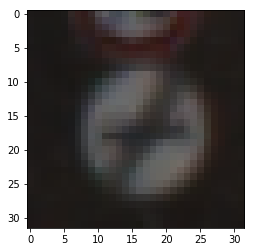

In [34]:
plt.imshow(train['features'][0])

# Visualize the data

category -  41


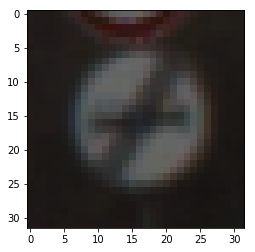

In [7]:
i = 11
plt.imshow(X_train[i]) # Show images are not shuffled
print("category - ",y_train[i])

# DATA PEPARATION

In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
# images were grayscaled using average of R, G and B
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [10]:
#images normalized
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

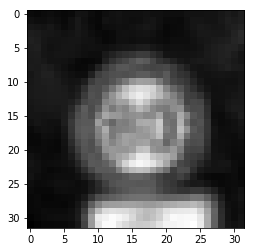

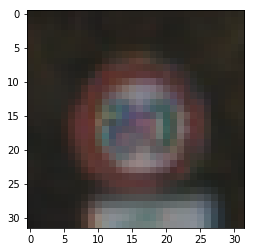

In [12]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

# It's Time!!

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [14]:
image_shape = X_train_gray[i].shape

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 43, activation = 'sigmoid'))

In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [17]:
%time history = cnn_model.fit(X_train_gray_norm, y_train, batch_size=500, nb_epoch=50, verbose=1, validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 9s 263us/step - loss: 3.2682 - acc: 0.0566 - val_loss: 3.1456 - val_acc: 0.0544
Epoch 2/50
34799/34799 [==============================] - 7s 195us/step - loss: 2.3225 - acc: 0.0569 - val_loss: 2.4121 - val_acc: 0.0544
Epoch 3/50
34799/34799 [==============================] - 7s 195us/step - loss: 1.7855 - acc: 0.0569 - val_loss: 2.1163 - val_acc: 0.0544
Epoch 4/50
34799/34799 [==============================] - 7s 206us/step - loss: 1.5390 - acc: 0.0569 - val_loss: 1.9118 - val_acc: 0.0544
Epoch 5/50
34799/34799 [==============================] - 8s 225us/step - loss: 1.3947 - acc: 0.0569 - val_loss: 1.8315 - val_acc: 0.0544
Epoch 6/50
34799/34799 [==============================] - 7s 197us/step - loss: 1.2934 - acc: 0.0569 - val_loss: 1.7485 - val_acc: 0.0544
Epoch 7/50
34799/34799 [==============================] - 7s 197us/step - loss: 1.2175 - acc: 0.0569 - val_loss: 1.7502 - v

## It's Result time!

In [18]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8800


## we can even plot of accuracy at every epoch

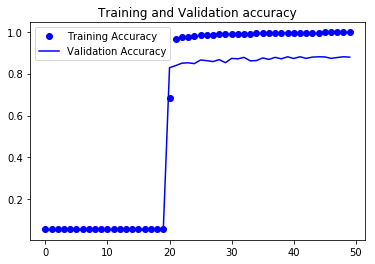

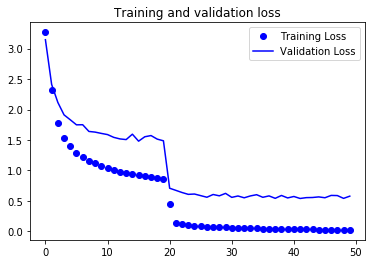

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

[[ 16  26   0 ...   0   0   0]
 [  1 684  11 ...   0   0   0]
 [  0  63 666 ...   0   0   0]
 ...
 [  2   2   0 ...  65   0   0]
 [  0   0   0 ...   0  45   0]
 [  0   1   0 ...   0   5  78]]


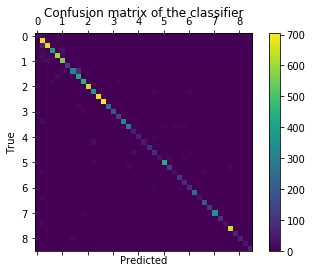

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)

labels = list(range(42))
cm = confusion_matrix(y_test, predicted_classes)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

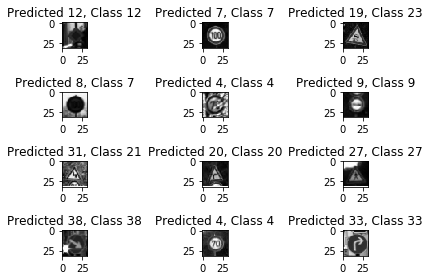

In [39]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()